In [1]:
import numpy as np
import random
import pandas as pd
from sklearn import tree
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [2]:
raw = pd.read_csv('train.tsv',sep = '\t')
sample = pd.read_csv('test.tsv',sep = '\t')

In [3]:
x_raw = raw['Phrase'].values
y_raw = raw['Sentiment'].values
x_sample = sample['Phrase'].values
count_vect = CountVectorizer()
x= count_vect.fit_transform(x_raw)
x_test = count_vect.transform(x_sample)
tf_idf = TfidfTransformer()
x_train_tfidf = tf_idf.fit_transform(x)
x_test_tfidf = tf_idf.transform(x_test)

In [14]:
def train(X, y_raw, l_rate):
    clf = SGDClassifier(loss='log', penalty=None, learning_rate='constant', eta0=l_rate)
    loss_list = []
    for i in range(10000):
        clf.partial_fit(x,y_raw,classes = np.unique(y_raw))
        result = clf.predict_proba(x)
        if (i%100)==0:
            loss_list.append(log_loss(y_raw,result))
        else:
            pass
    return loss_list

l_rates = [1e-4,1e-3,1e-2]

loss_lists = []
for l_rate in l_rates:
    loss_list = train(x, y_raw, l_rate)
    loss_lists.append(loss_list) 
    print("this round is done.")

this round is done.
this round is done.
this round is done.


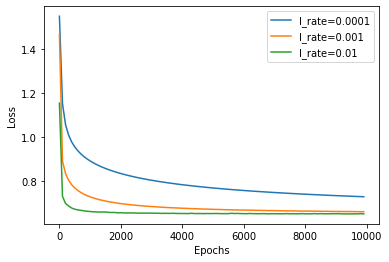

In [15]:
fig = plt.figure()
for i in range(len(loss_lists)):
    plt.plot(np.arange(0,10000,100), loss_lists[i], label='l_rate={}'.format(l_rates[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')

In [27]:
clf = SGDClassifier(loss='log', penalty= None, max_iter=8000, tol=None, learning_rate='constant', eta0=1e-2)
clf.fit(x_train_tfidf,y_raw)
prediction = clf.predict(x_test_tfidf)

In [28]:
submission = pd.read_csv('sampleSubmission.csv',sep = ',')

In [29]:
submission['Sentiment'] = prediction

In [30]:
submission.to_csv('Submission_LogisticRegression.csv',index=False)

In [21]:
submission

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,1
66290,222351,1


In [4]:
train,test = train_test_split(raw,test_size = 0.2,random_state = 1234)

In [5]:
x = train['Phrase'].values
y = train['Sentiment'].values
x_test = test['Phrase'].values
real_y = test['Sentiment'].values
count_vect = CountVectorizer()
x_vector = count_vect.fit_transform(x)
trans_x_test = count_vect.transform(x_test) 
tf_idf = TfidfTransformer()
x_train_tfidf = tf_idf.fit_transform(x_vector)
x_test_tfidf = tf_idf.transform(trans_x_test)

In [6]:
clf = SGDClassifier(loss='log', penalty= None, max_iter=8000, tol=None, learning_rate='constant', eta0=1e-2)
clf.fit(x_train_tfidf,y)
predict = clf.predict(x_test_tfidf)

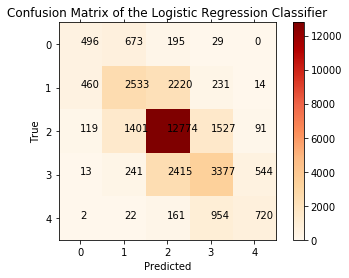

In [8]:
cm = confusion_matrix(real_y, predict)
labels=['0','1','2','3','4']
fig_dtc = plt.figure()
ax_dtc = fig_dtc.add_subplot(111)
cax_dtc = ax_dtc.imshow(cm,cmap='OrRd')
ax_dtc.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
plt.title('Confusion Matrix of the Logistic Regression Classifier')
fig_dtc.colorbar(cax_dtc)
ax_dtc.set_yticklabels([''] + labels)
ax_dtc.set_xticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j,i, str(cm[i][j]))
plt.show()